### 도시가스 고객센터 상담이력정보 분석 - 2. 상담원 업무강도 파악 
- Source Data : 이지원 상담이력정보 테이별(APDB_CL_CS_COUNSEL_CALL_HISTORY_TM) 
- DB info. : DataPlatform RDS(MSSQL)
- Raw Data size : 13,558,241건 (2019.12.02~2023.07.21, 약 8.3GB) 
- 분석대상 Data size : 10,854,342건 (2020.01.01~2022.12.31, 압축후 약 1.4GB)
- columns 정보 : http://localhost:8888/doc/tree/work_2023/07.%EA%B5%90%EC%9C%A1_%EC%9D%B8%EC%9E%85%EC%BD%9C%ED%9A%A8%EC%9C%A8%ED%99%94/columns_detail.png
---

In [ ]:
## 필수 pkg's 및 한글폰트 사용 설정 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
import time 

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes',unicode_minus=False)

In [2]:
## Dataset loading 
df_20_22 = pd.read_parquet('data/df_20_22.parquet')
print(df_20_22.shape)
pd.set_option('display.max_columns', None)
df_20_22.head(2)

(10854342, 64)


,COUNSEL_CALL_HISTORY_EID,TEL,BOUND_TYPE_CODE,ARS_CHANNEL,START_TIME,END_TIME,CALL_TIME,PAYER_NUMBER,CUSTOMER_NAME,CUSTOMER_DIVISION_CLAS_CODE,DUTY_TYPE_CLAS_CODE,CENTER_NAME,CENTER_CODE,COUNSEL_NAME,CALL_RESULT_CODE,HOUSE_TYPE_CODE,USE_TYPE_CODE,CALL_ID,COUNSEL_MEMO,COUNSEL_TYPE_CODE,RELATIONSHIP_CODE,RELATIONSHIP_CENTER_CODE,ENTITY_STATUS,MOD_DATE,REG_DATE,MOD_USER_ENTITY_ID,REG_USER_ENTITY_ID,TRF_USER_ENTITY_ID,TRF_DATE,CALLBACK_TYPE_CODE,CALLBACK_FIT_CODE,DUTY_TYPE_CODE,CUSTOMER_DIVISION_CODE,BOUND_TYPE,CUSTOMER_DIVISION_CLAS,DUTY_TYPE_CLAS,HOUSE_TYPE,USE_TYPE,COUNSEL_TYPE,DUTY_TYPE,CUSTOMER_DIVISION,CALLBACK_TYPE,CALLBACK_FIT,CALL_RESULT,EXTENSION,END_CALL_TYPE,END_CALL_TYPE_CODE,REGION,REGION_CODE,GENDER,GENDER_CODE,BIRTH_DATE,PROCESS_CALLBACK_TYPE_CODE,PROCESS_CALLBACK_TYPE,URGENT_CODE,URGENT,VOC_ENTITY_ID,PARTNER,call_year,call_month,call_day,call_hour,call_weekday,call_duration
0,9090489.0,01073582130,IB,0상담원연결,2020-02-07 13:28:13,2020-02-07 13:30:56,163000.0,106132865,None,None,None,권선,40,None,None,None,None,8B1BBFEB-0D51-427B-9577-929CA6614F24,None,None,None,None,UPDATE,2020-02-07 13:30:56,2020-02-07 13:28:13,1844.0,1844.0,None,None,None,None,None,None,인바운드,None,None,None,None,None,None,None,None,None,None,6332,None,None,None,None,None,None,NaN,None,None,None,None,None,None,2020,2,7,13,Friday,163.0
1,9090774.0,01072420850,IB,0상담원연결,2020-02-07 13:28:50,2020-02-07 13:29:56,66000.0,304793771,None,None,None,동인천,11,None,None,None,None,E3F4CAFB-420D-47CC-BE30-07A8A915D220,None,None,None,None,UPDATE,2020-02-07 13:29:56,2020-02-07 13:28:50,1678.0,1678.0,None,None,None,None,None,None,인바운드,None,None,None,None,None,None,None,None,None,None,6031,None,None,None,None,None,None,NaN,None,None,None,None,None,None,2020,2,7,13,Friday,66.0


In [3]:
## 연도별 상담원 인원 현황 (unique한 내선번호(Extention)을 상담원 1명으로 간주)
df_20_22.groupby('call_year')['EXTENSION'].nunique()

call_year
2020    267
2021    259
2022    260
Name: EXTENSION, dtype: int64

- 연도별 총 통화시간(시간) = call_year
2020    143721.65
2021    129278.73
2022    119576.65
Name: call_duration, dtype: float64
- 연도별 건당 평균 통화시간(분) = call_year
2020    2.21
2021    2.17
2022    2.15
Name: call_duration, dtype: float64


[Text(0.5, 1.0, '연도별 건당 평균 통화시간(분)')]

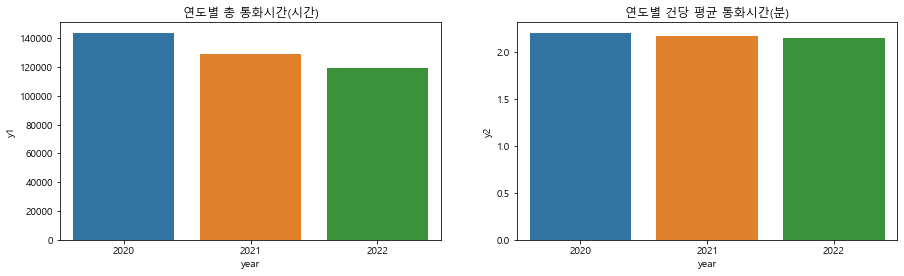

In [31]:
## 연도별 총 통화시간 & 평균 통화시간 
a = df_20_22.groupby('call_year')['call_duration'].sum() 
b = df_20_22.groupby('call_year')['call_duration'].mean() 
          
print('- 연도별 총 통화시간(시간) =', round(a/3600, 2))
print('- 연도별 건당 평균 통화시간(분) =', round(b/60, 2))
#############################################################
call_plot = pd.DataFrame({'year':['2020', '2021', '2022'],
                          'y1':[143721.65, 129278.73, 119576.65],
                          'y2':[2.21, 2.17, 2.15]})

figure, (ax1,ax2) = plt.subplots(ncols=2)
figure.set_size_inches(15,4)
sns.barplot(data=call_plot, x= 'year', y='y1', ax=ax1)
sns.barplot(data=call_plot, x= 'year', y='y2', ax=ax2)
ax1.set(title = '연도별 총 통화시간(시간)')
ax2.set(title = '연도별 건당 평균 통화시간(분)')

In [54]:
## 연도별 데이터셋 분리 
df_2020 = df_20_22[df_20_22['call_year'] == 2020]
df_2021 = df_20_22[df_20_22['call_year'] == 2021]
df_2022 = df_20_22[df_20_22['call_year'] == 2022]

## 상담원 1인당 연간 통화건수 계산 
## 해당년도의 총 통화건수(n20xx)를 같은 연도의 상담원 인원수(p20xx)로 나눈다. 
n2020 = df_2020.shape[0]
n2021 = df_2021.shape[0]
n2022 = df_2022.shape[0]

p2020 = 267
p2021 = 259
p2022 = 260

print('-2020년 인당 통화건수 =', round(n2020/p2020, 2))
print('-2021년 인당 통화건수 =', round(n2021/p2021, 2))
print('-2022년 인당 통화건수 =', round(n2022/p2022, 2))

-2020년 인당 통화건수 = 14655.22
-2021년 인당 통화건수 = 13883.3
-2022년 인당 통화건수 = 12867.78


In [57]:
## 상담원 1인당 연간 통화시간 계산 
## 해당년도의 총 통화시간(d20xx)를 같은 연도의 상담원 인원수(p20xx)로 나눈다. 
d2020 = df_2020['call_duration'].sum()
d2021 = df_2021['call_duration'].sum()
d2022 = df_2022['call_duration'].sum()

print('-2020년 인당 통화시간(시간) =', round((d2020/p2020)/3600, 2))
print('-2021년 인당 통화시간(시간) =', round((d2021/p2021)/3600, 2))
print('-2022년 인당 통화시간(시간) =', round((d2022/p2022)/3600, 2))

-2020년 인당 통화시간(시간) = 538.28
-2021년 인당 통화시간(시간) = 499.15
-2022년 인당 통화시간(시간) = 459.91


In [61]:
## 연간 근무일수(주말, 공휴일 제외)를 250일로 가정시 인당 하루평균 통화시간 
print('-2020년 일평균 통화시간 =', 538.28/250)
print('-2021년 일평균 통화시간 =', 499.15/250)
print('-2022년 일평균 통화시간 =', 459.91/250)

-2020년 일평균 통화시간 = 2.15312
-2021년 일평균 통화시간 = 1.9966
-2022년 일평균 통화시간 = 1.8396400000000002
